In [12]:
import random

num_vertices = 100
num_edges = 200

# Initialize an empty adjacency matrix
adjacency_matrix = [[0] * num_vertices for i in range(num_vertices)]

# Generate random edges while ensuring symmetry
edges_generated = 0
while edges_generated < num_edges:
    vertex1 = random.randint(0, num_vertices - 1)
    vertex2 = random.randint(0, num_vertices - 1)

    if vertex1 != vertex2 and adjacency_matrix[vertex1][vertex2] == 0:
        adjacency_matrix[vertex1][vertex2] = 1
        adjacency_matrix[vertex2][vertex1] = 1
        edges_generated += 1

# Convert the adjacency matrix into an adjacency list
adjacency_list = {}
for i in range(num_vertices):
    neighbors = []
    for j in range(num_vertices):
        if adjacency_matrix[i][j] == 1:
            neighbors.append(j)
    adjacency_list[i] = neighbors

# Print several rows of the adjacency matrix
print("Adjacency Matrix (Partial):")
for i in range(5):
    print(adjacency_matrix[i])

# Print several rows of the adjacency list
print("\nAdjacency List (Partial):")
for vertex, neighbors in adjacency_list.items():
    if vertex < 10:
        print(f"{vertex}: {neighbors}")


Adjacency Matrix (Partial):
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

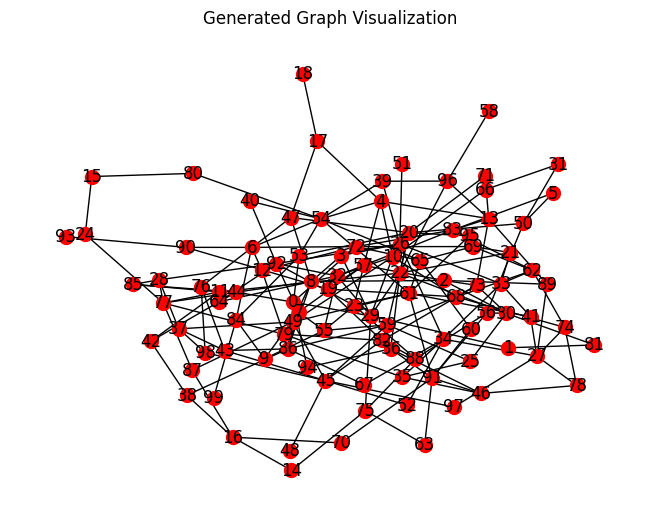

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a networkx graph from the adjacency list
G = nx.Graph(adjacency_list)

# Visualize the graph using the default spring layout
pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_size=100, node_color='red', font_size=12)
plt.title("Generated Graph Visualization")
plt.show()

In [14]:
# Code for printing shortest path between two vertices of unweighted graph
  
# a modified version of BFS that stores predecessor
# of each vertex in array p
# and its distance from source in array d
def BFS(adj, src, dest, v, pred, dist):
 
    # a queue to maintain queue of vertices whose
    # adjacency list is to be scanned as per normal
    # DFS algorithm
    queue = []
  
    # boolean array visited[] which stores the
    # information whether ith vertex is reached
    # at least once in the Breadth first search
    visited = [False for i in range(v)];
  
    # initially all vertices are unvisited
    # so v[i] for all i is false
    # and as no path is yet constructed
    # dist[i] for all i set to infinity
    for i in range(v):
 
        dist[i] = 1000000
        pred[i] = -1;
     
    # now source is first to be visited and
    # distance from source to itself should be 0
    visited[src] = True;
    dist[src] = 0;
    queue.append(src);
  
    # standard BFS algorithm
    while (len(queue) != 0):
        u = queue[0];
        queue.pop(0);
        for i in range(len(adj[u])):
         
            if (visited[adj[u][i]] == False):
                visited[adj[u][i]] = True;
                dist[adj[u][i]] = dist[u] + 1;
                pred[adj[u][i]] = u;
                queue.append(adj[u][i]);
  
                # We stop BFS when we find
                # destination.
                if (adj[u][i] == dest):
                    return True;
  
    return False;
  
# utility function to print the shortest distance
# between source vertex and destination vertex
def printShortestDistance(adj, s, dest, v):
     
    # predecessor[i] array stores predecessor of
    # i and distance array stores distance of i
    # from s
    pred=[0 for i in range(v)]
    dist=[0 for i in range(v)];
  
    if (BFS(adj, s, dest, v, pred, dist) == False):
        print("Given source and destination are not connected")
  
    # vector path stores the shortest path
    path = []
    crawl = dest;
    path.append(crawl);
     
    while (pred[crawl] != -1):
        path.append(pred[crawl]);
        crawl = pred[crawl];
     
    print(f"Shortest Path from {s} to {dest}: {path}")
    print("Path lenght is: ", len(path)-1)
    for i in path:
        print(f"{i} -> {adjacency_list[i]}")
    print('Finished!')

In [15]:
#print Shortest Distance
source = random.randint(0, num_vertices - 1)
dest = random.randint(0, num_vertices - 1)
printShortestDistance(adjacency_list, source, dest, num_vertices);

Shortest Path from 17 to 92: [92, 32, 10, 4, 17]
Path lenght is:  4
92 -> [7, 12, 23, 26, 28, 32, 40, 64]
32 -> [10, 29, 55, 64, 83, 92]
10 -> [4, 29, 32, 49, 66, 68]
4 -> [10, 13, 17, 54, 57]
17 -> [4, 18, 47]
Finished!


In [16]:
def DFS(adj, temp, v, visited):
 
    # Mark the current vertex as visited
    visited[v] = True
 
    # Store the vertex to list
    temp.append(v)
 
    # Repeat for all vertices adjacent
    # to this vertex v
    for i in adj[v]:
        if visited[i] == False:
            # Update the list
            temp = DFS(adj, temp, i, visited)
    return temp
 
def connectedComponents(adjacency_list):
    visited = []
    cc = []
    for i in range(num_vertices):
        visited.append(False)
    for v in range(num_vertices):
        if visited[v] == False:
            temp = []
            cc.append(DFS(adjacency_list, temp, v, visited))
    return cc
 
cc = connectedComponents(adjacency_list)
print("Following are connected components")
print(cc)

Following are connected components
[[0, 53, 20, 22, 11, 42, 38, 16, 14, 75, 29, 1, 81, 30, 2, 8, 3, 26, 33, 21, 69, 62, 68, 10, 4, 13, 71, 73, 82, 45, 43, 37, 28, 77, 24, 15, 80, 54, 6, 12, 72, 65, 60, 91, 36, 19, 57, 7, 9, 55, 23, 61, 41, 27, 34, 35, 25, 59, 86, 67, 46, 78, 74, 79, 52, 89, 97, 49, 87, 95, 88, 56, 50, 5, 83, 32, 64, 44, 85, 92, 40, 31, 66, 84, 99, 90, 93, 94, 63, 70, 39, 96, 58, 98, 76, 47, 17, 18, 48, 51]]
